<a href="https://colab.research.google.com/github/LNickelsburg/title-prediction/blob/main/NLP_Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision
!pip install -U transformers
!pip install -U simpletransformers
!pip install rouge-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 90.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 20.0 MB/s eta 0:00:00


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

titles = [];
lyrics = [];
dates = [];

def readDetails(fileName):
  data = pd.read_csv('/content/songs/'+fileName)
  global titles
  global lyrics
  global dates

  data_titles = data['Title'].tolist()
  data_lyrics = data['Lyric'].tolist()
  data_dates = data['Date'].tolist()

  if (len(data_titles) > 30) :
    n = 60
    data_titles = data_titles[0:n]
    data_lyrics = data_lyrics[0:n]
    data_dates = data_dates[0:n]

  titles = titles + data_titles
  lyrics = lyrics + data_lyrics
  dates = dates + data_dates



dir = 'songs'

for file in os.listdir(dir):
  if file.endswith(".csv"):
    readDetails(file)

titles = list(map(str, titles))
lyrics = list(map(str, lyrics))
dates = list(map(str, dates))
print(len(titles));
print(len(lyrics));
print(len(dates))



FileNotFoundError: ignored

In [ ]:
songs = pd.DataFrame({
    'title': titles,
    'lyrics': lyrics,
    'date': dates
})
songs.head()

,title,lyrics,date


In [ ]:
songs = songs[['title', 'lyrics', 'date']]
songs.columns = ['target_text', 'input_text', 'date']
print(songs)

songs['prefix'] = "summarize"

eval_df = songs.sample(frac=0.2, random_state=101)
train_df = songs.drop(eval_df.index)

train_df.shape, eval_df.shape
print(eval_df.iloc[100]['date'])

Empty DataFrame
Columns: [target_text, input_text, date]
Index: []


IndexError: ignored

In [ ]:
import logging

import pandas as pd
from simpletransformers.t5 import T5Model

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

model_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "max_seq_length": 200,
    "train_batch_size": 10,
    "num_train_epochs": 1,
}

model = T5Model(model_type="t5", model_name="t5-small", args=model_args, use_cuda=False)
model.train_model(train_df)
results = model.eval_model(eval_df)

print(results)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=True`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


0it [00:00, ?it/s]

ValueError: ignored

In [ ]:
eval_num = 252

result_titles = [];
original_titles = [];
result_lyrics = [];

for x in range(eval_num):
  actual_title = eval_df.iloc[x]['target_text']
  actual_lyrics = ["summarize: "+eval_df.iloc[x]['input_text']]
  predicted_title = model.predict(actual_lyrics)
  result_titles.append(predicted_title)
  original_titles.append(actual_title)
  result_lyrics.append(actual_lyrics)


print(len(result_titles))

IndexError: ignored

In [ ]:
print(len(result_titles))
print(len(original_titles))
print(len(result_lyrics))

for x in range(252):
  print(result_titles[x])
  print(original_titles[x])
  print(result_lyrics[x])
  print("\n")


252
252
252
['(Sea)']
So Far Away (Jin & Jungkook Cover)
["summarize: 슈가 하고 싶은 게 없다는 게 진짜 뭣 같은데 없다는 게 흔한 꿈조차 없다는 게 한심한 거 알어 다 아는데 하란 대로만 하면 된다며 대학가면 다 괜찮아 그런 말들을 믿은 내가 병신이지 나 죽지 못해 살어   슈가 술이나 좀 줘봐 술이나 좀 줘봐 오늘은 취하고 싶으니 제발 말리지 마 뭐든 좋아 뭐든 좋아 백수 새끼가 술 마시는 건 사치지만 취하지도 않음 버틸 수가 없어 ay 모두가 달리는데 왜 나만 여기 있어 ay 모두가 달리는데 왜 나만 여기 있어 ay 모두가 달리는데 왜 나만 여기서 있지   진 정국 so far away 나에게도 꿈이 있다면 날아가는 꿈이 있다면 don't fall away yea 나에게도 꿈이 있다면 날아가는 꿈이 있다면 oh oh oh  refrain 슈가 정국 dream 그대의 창조와 삶의 끝에 함께 하길 ouuuuu dream 그대의 자리가 어딜지라도 관대 하리 aaahahh dream 결국 시련의 끝에 만개하리 만개하리 dream 시작은 미약할지언정 끝은 창대하리   슈가 그래 시발 죽지 못해서 살아 살아 하고 싶은 게 없단 건 말야 말야 무엇보다 괴로운데 외로운데 주변에선 하나 같이 정신차려 란 말뿐이네 화풀이해 상대는 뭐 나뿐인데 뭘 화풀이해 매일 아침에 눈 뜨는 게 숨 쉬는 게 쉬는 게 무섭네  4 슈가 친구와 가족 조차 멀어져만 가네 ay 시간이 흐르면 흐를수록 더 조급하네 ay 나 혼자인 기분 나 혼자인 지금 모든 게 사라졌음 해 신기루 처럼 사라졌음 해 사라 졌음 해 이젠 빌어 먹을 나조차도 사라졌음 해 이렇게 세상에 나 버려지네 ay 그 순간 하늘과 멀어지네 떨어지네 떨어지네   정국 진 so far away 나에게도 꿈이 있다면 날아가는 꿈이 있다면 don't fall away 나에게도 꿈이 있다면 날아가는 꿈이 있다면 oh oh oh  refrain 슈가 정국 진 dream oh oh oh 그

In [ ]:
import csv
rows = zip(result_titles, original_titles, result_lyrics)

with open('results.csv', 'w', newline='') as file:
    writer = csv.writer(file)

    writer.writerow(['Result Titles', 'Original Titles', 'Lyrics'])

    for row in rows:
        writer.writerow(row)


In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Levenshtein

# EVALUATION METRIC: attempted ROUGE and cosine similarity libraries, did not give meaningful results
# So ended up using Levenshtein Distance:

similarity_scores = []

for x in range(252):
  predicted_text = result_titles[x][0].lower()
  reference_text = original_titles[x][0].lower()
  lev_distance = Levenshtein.distance(predicted_text, reference_text)
  lev_similarity = 1 - (lev_distance / max(len(predicted_title), len(actual_title)))
  similarity_scores.append(lev_similarity)
  print(lev_similarity)



0.7142857142857143
0.5
0.0714285714285714
0.8571428571428572
0.7142857142857143
0.5
-0.1428571428571428
0.2857142857142857
-0.5
-0.7857142857142858
0.4285714285714286
-0.4285714285714286
0.1428571428571429
0.3571428571428571
0.3571428571428571
-0.0714285714285714
-1.0
0.0
0.3571428571428571
0.6428571428571428
0.2857142857142857
0.7857142857142857
0.7142857142857143
0.3571428571428571
0.7857142857142857
0.4285714285714286
0.7142857142857143
0.1428571428571429
0.6428571428571428
0.5714285714285714
-0.2857142857142858
0.7142857142857143
0.2857142857142857
0.7142857142857143
-0.2142857142857142
0.7142857142857143
0.7857142857142857
0.1428571428571429
0.3571428571428571
0.4285714285714286
0.2142857142857143
0.7142857142857143
0.1428571428571429
0.7142857142857143
0.5
-0.3571428571428572
0.5
0.7857142857142857
-0.2857142857142858
0.4285714285714286
0.5714285714285714
0.6428571428571428
0.4285714285714286
0.3571428571428571
0.7142857142857143
-0.7142857142857142
0.7857142857142857
0.785714285

In [ ]:
import pandas as pd
import os

# IGNORE: deprecated

dir = 'songs'

titleKey = []
artistsValue = []
res = {}

def createArtistTitleMap(fileName):
  data = pd.read_csv('/content/songs/'+fileName)
  global titleKey
  global artistsValue

  titleKey = titleKey + data['Title'].tolist()
  artistsValue = artistsValue + data['Artist'].tolist()

def createMap():
  global res

  for key in titleKey:
    for value in artistsValue:
        res[key] = value
        artistsValue.remove(value)
        break

for file in os.listdir(dir):
  if file.endswith(".csv"):
    createArtistTitleMap(file)
    createMap()

titleKey = list(map(str, titleKey))
artistsValue = list(map(str, artistsValue))
print(len(titleKey));
print(len(artistsValue));
print(len(res))
print(res)


6027
0
521
{'God’s Plan': 'Dua Lipa', 'In My Feelings': 'Dua Lipa', 'Hotline Bling': 'Dua Lipa', 'One Dance': 'Dua Lipa', 'Hold On, We’re Going Home': 'Dua Lipa', 'Know Yourself': 'Dua Lipa', 'Back to Back': 'Dua Lipa', 'All Me': 'Dua Lipa', 'Fake Love': 'Dua Lipa', 'From Time': 'Dua Lipa', '0 to 100 / The Catch Up': 'Dua Lipa', 'The Motto': 'Dua Lipa', 'Started from the Bottom': 'Dua Lipa', 'Pound Cake / Paris Morton Music 2': 'Dua Lipa', 'Marvin’s Room': 'Dua Lipa', 'HYFR': 'Dua Lipa', 'Nice For What': 'Dua Lipa', 'Passionfruit': 'Dua Lipa', 'Child’s Play': 'Dua Lipa', 'Energy': 'Dua Lipa', 'Too Good': 'Dua Lipa', 'Furthest Thing': 'Dua Lipa', 'Jungle': 'Dua Lipa', 'Over My Dead Body': 'Dua Lipa', 'Worst Behavior': 'Dua Lipa', 'Summer Sixteen': 'Dua Lipa', 'The Language': 'Dua Lipa', 'Girls Love Beyoncé': 'Dua Lipa', 'How Bout Now': 'Dua Lipa', 'Too Much': 'Dua Lipa', 'Shot for Me': 'Dua Lipa', 'Legend': 'Dua Lipa', 'Portland': 'Dua Lipa', 'Nonstop': 'Dua Lipa', 'Controlla': 'Dua Lip

252
252


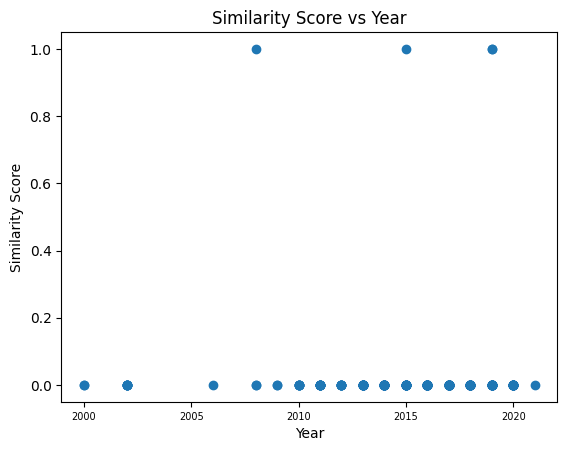

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.002620
Date:                Tue, 02 May 2023   Prob (F-statistic):              0.959
Time:                        19:15:05   Log-Likelihood:                 166.48
No. Observations:                 252   AIC:                            -329.0
Df Residuals:                     250   BIC:                            -321.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2254      4.093      0.055      0.9

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import math

# BEFORE plotting, need to extract evaluation set dates and cast into numbers
dates = []
for x in range(252):
  date = float(eval_df.iloc[x]['date'].split("-")[0])
  if math.isnan(date):
    date = 2017
  dates.append(date)


scores = [ x * -1 for x in similarity_scores ]

dates = list(map(int, dates))
scores = list(map(int, scores))

print(len(dates))
print(len(scores))

# FROM HERE, its related to PLOTTING the data

# create scatter plot
plt.scatter(dates, scores)

# set x and y labels
plt.xlabel("Year")
plt.ylabel("Similarity Score")
plt.xticks(fontsize=7)

# set title
plt.title("Similarity Score vs Year")

# show plot
plt.show()

# fit linear regression model
model = sm.OLS(scores, sm.add_constant(dates)).fit()

# generate summary table
print(model.summary())


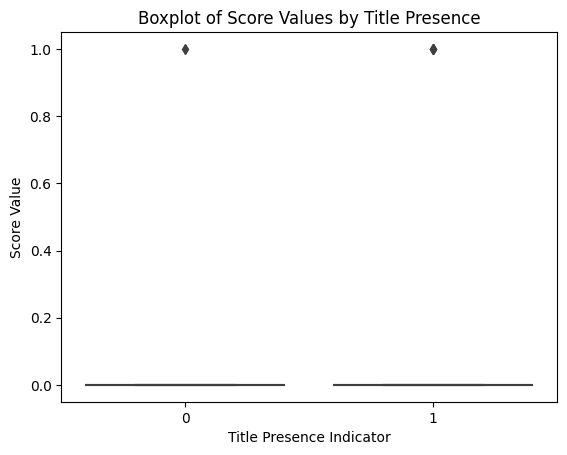

Correlation coefficient: 0.028398091712353236
P-value: 0.6536805704280331
t-statistic: -0.4818254163026702
p-value: 0.6304023353422723


In [ ]:
import seaborn as sns
from scipy.stats import pointbiserialr
from scipy import stats


# BEFORE plotting, make the INDICATOR variable list, whether title is included in lyrics
indicators = []
for x in range(252):
  title = original_titles[x].lower()
  lyrics = result_lyrics[x][0].lower()
  if title in lyrics:
    indicators.append(1)
  else:
    indicators.append(0)


# FROM HERE, its related to PLOTTING the data
data = {'Title Presence Indicator': indicators, 'Similarity Score': scores}

# create a dataframe from the dictionary
df = pd.DataFrame(data)

# create a boxplot
sns.boxplot(x='Title Presence Indicator', y='Similarity Score', data=df)

# set x and y labels
plt.xlabel("Title Presence Indicator")
plt.ylabel("Score Value")

# set title
plt.title("Boxplot of Score Values by Title Presence")

# show plot
plt.show()

# STATISTIC 1: CORRELATION coefficient with p-value
corr, pval = pointbiserialr(indicators, scores)

print("Correlation coefficient:", corr)
print("P-value:", pval)

# STATISTIC 2: T-Stat with p-value (two-sample t-test)

# separate the score values into two groups based on binary_var
group_0 = [scores[i] for i in range(len(indicators)) if indicators[i] == 0]
group_1 = [scores[i] for i in range(len(indicators)) if indicators[i] == 1]

# perform a two-sample t-test assuming unequal variances
t_stat, p_val = stats.ttest_ind(group_0, group_1, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

